<a href="https://colab.research.google.com/github/microprediction/microprediction-notebooks/blob/main/hello_mssa_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import logging, sys
logging.disable(sys.maxsize)

In [ ]:
!pip install microprediction

In [ ]:
!pip install git+https://github.com/kieferk/pymssa.git

In [11]:
from microprediction import MicroReader
mr = MicroReader()
YS = mr.get_lagged_values(name='emojitracker-twitter-winking_face.json')[0:1000]
YS[:5]

[97.0, 122.0, 123.0, 102.0, 101.0]

In [ ]:
from pymssa import MSSA
import pandas as pd 
import datetime 
import numpy as np 
import warnings
warnings.filterwarnings('ignore')

def run(ys):
    burnin = 950

    def next_value(ys):
        mssa = MSSA(n_components='svht',
            window_size=None,
            verbose=True)
        mssa.fit(pd.DataFrame(ys))
        y_hat = mssa.forecast(1).squeeze()
        return y_hat

    y_hats = list()
    for t in range(len(ys)):
        if t > burnin:
            y_hat = next_value(ys[:t])
        elif t >= 1:
            y_hat = ys[t - 1]
        else:
            y_hat = 0
        y_hats.append(y_hat)
    return y_hats
XS = run(YS)

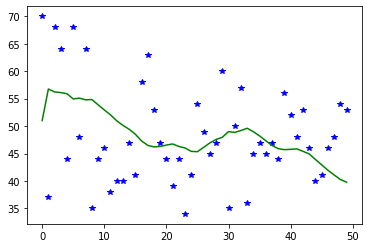

In [13]:
import matplotlib.pyplot as plt
plt.plot(YS[950:],'*b')
plt.plot(XS[950:],'g')